In [3]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
rating=pd.read_csv('data/animelists_cleaned.csv')

In [27]:
rating.shape

(31284030, 11)

In [8]:
anime_rated_times = pd.Series(rating["anime_id"].value_counts())

In [11]:
print(len(anime_rated_times[anime_rated_times > 1000]),"over", 
      len(anime_rated_times),"animes are rated more than 1000 times")

3897 over 6668 animes are rated more than 1000 times


In [12]:
print(len(anime_rated_times[anime_rated_times > 100]),"over", 
      len(anime_rated_times),"animes are rated more than 1000 times")

5846 over 6668 animes are rated more than 1000 times


In [28]:
unused_anime = set(anime_rated_times[anime_rated_times < 100].index.values)

In [29]:
anime_reduced=rating[rating["anime_id"].map(lambda x: x not in unused_anime)]

In [5]:
user_rate_times = pd.Series(rating["username"].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x288200d30>,
 'caps': [<matplotlib.lines.Line2D at 0x28810c630>,
 'boxes': [<matplotlib.lines.Line2D at 0x288200be0>],
 'medians': [<matplotlib.lines.Line2D at 0x28810ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x28811a2e8>],
 'means': []}

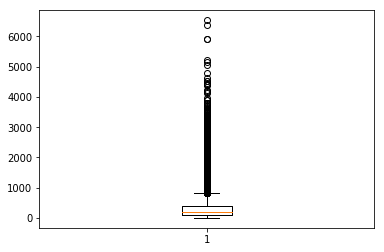

In [21]:
plt.boxplot(user_rate_times)

In [30]:
print(len(user_rate_times[user_rate_times > 5]),"over", len(user_rate_times),"users rate more than 5 times")

106499 over 108709 users rate more than 5 times


In [31]:
unused_user = set(user_rate_times[user_rate_times < 5].index.values)

In [32]:
both_reduced = anime_reduced[anime_reduced["username"].map(lambda x: x not in unused_user)]

In [33]:
both_reduced.shape

(31248594, 11)

In [35]:
both_reduced.to_csv("animelists_reduced.csv", index=False)